## Часть 1 


### 1
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


______________________________________________________________________________________________________________________

Прокурор оценил вероятность 
$P(Редкая|Невиновен) = P(Редкая) = 0.01$ 

И далее выразил вероятность $P(Редкая | Виновен) = 1 - P(Редкая|Невиновен)$

Мне кажется, что это неверно, т.к. по условию задачи, в целом шанс, что у человека такая группа крови 1%, а не при условии невиновности. Да и нет смысла вычислять вероятность того, что у подсудимого, если он виновен, кровь принадлежит редкой группе, ведь известно (с вероятностью 1), что у виновного эта группа крови.
 
Получается, что прокурору было необходимо оценить вероятность 

$ P(Виновен|Редкая) = \frac {P(Редкая|Виновен) * P(Виновен)}{P(Редкая)} = \frac{1 * P(Виновен)} {0.01}$
 


### 2


Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?


______________________________________________________________________________________________________________________

Адвокат оценил вероятность того, что случайный человек, кровь которого принадлежит редкой группе, будет виновен как $\frac{1}{10000}$. По сути, ему необходимо было также учесть вероятность встретить человека с редкой группой крови

Как мне кажется, ему необходимо было оценить ту же вероятность, что и прокурору, а именно

$ P(Виновен|Редкая) = \frac {P(Редкая|Виновен) * P(Виновен)}{P(Редкая)} = \frac{1 * P(Виновен)} {0.01}$


### 3

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


______________________________________________________________________________________________________________________

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

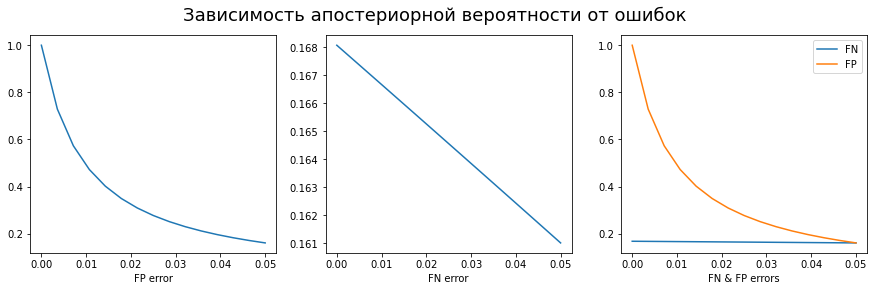

In [85]:
x = np.linspace(0, 0.05, 15)

def post_prob(fp_error, fn_error):
    P_SICK = 0.01
    P_OK = 1 - P_SICK
    return ((1 - fn_error) * P_SICK) / ((1 - fn_error) * P_SICK + fp_error * P_OK)
    

f, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize = (15,4));
f.suptitle('Зависимость апостериорной вероятности от ошибок', fontsize = 18)
sns.lineplot(x, list(map(lambda x: post_prob(x, 0.05), x)), ax = ax1);
sns.lineplot(x, list(map(lambda x: post_prob(0.05, x), x)), ax = ax2);
sns.lineplot(x, list(map(lambda x: post_prob(0.05, x), x)), ax = ax3);
sns.lineplot(x, list(map(lambda x: post_prob(x, 0.05), x)), ax = ax3);

ax1.set_xlabel("FP error");
ax2.set_xlabel("FN error");
ax3.set_xlabel("FN & FP errors");
ax3.legend(['FN', 'FP']);


Исходя из поведения апостериорной вероятности в зависимости от ошибок разного рода, можно сказать, что врачам лучше сосредоточиться на улучшения качества теста у здоровых людей, то есть сократить количество положительных ответов теста у здоровых пациентов. Если делать акцент на другой ошибке, то вероятность того, что человек болен при условии положительного теста удастся повысить в лучшем случае на нескольких тысячных.

## Часть 2

In [1]:
import pandas as pd

### 1

In [96]:
df = pd.read_csv('owid-covid-data.csv')

In [97]:
df = df[(df.location == 'Russia') & (df.date >= '2020-03-03')]

In [102]:
df['nday'] = range(1, len(df) + 1)

In [103]:
df = df[['total_cases', 'new_cases', 'nday', 'date']]
train = df.head(50)
test = df[df.date >= train.date.max()]

### 2

2
Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.


Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).
Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).


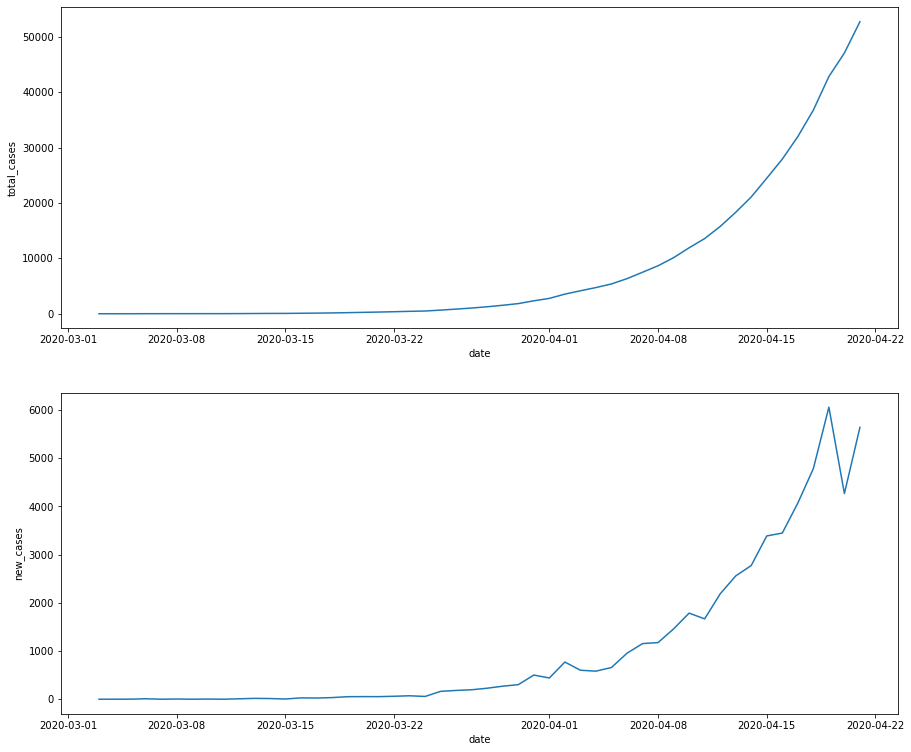

In [104]:
f, [ax1, ax2] = plt.subplots(2, 1, figsize = (15, 13))
sns.lineplot(pd.to_datetime(train.date),  train.total_cases, legend = 'brief', ax = ax1);
sns.lineplot(pd.to_datetime(train.date),  train.new_cases, legend = 'brief', ax = ax2);

In [509]:
y_total = np.array(np.log(train.total_cases).values)
y_new = np.array(np.log(train.new_cases.apply(lambda x: 1 if x == 0 else x)).values)
train['ones'] = 1
x = np.array([train.nday.values, train.ones.values]).T
#x = np.array([train.nday.values]).T


### a

In [510]:
w1 = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y_total)
w2 =  np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y_new)
#np.polyfit(x.T[0], y_new, deg = 1)

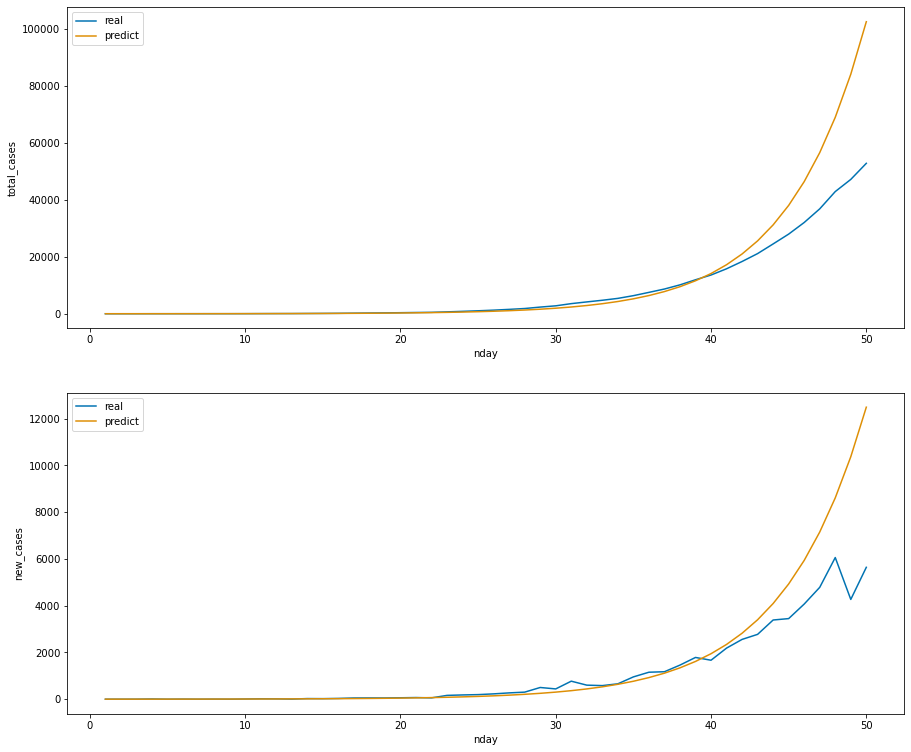

In [511]:
f, [ax1, ax2] = plt.subplots(2, 1, figsize = (15, 13))
sns.lineplot(train.nday,  train.total_cases,  ax = ax1);
sns.lineplot(train.nday, list(map(lambda x: np.exp(x * w1[0] + w1[1]), train.nday)) , ax = ax1);
ax1.legend(['real', 'predict'])
sns.lineplot(train.nday,  train.new_cases, ax = ax2);
sns.lineplot(train.nday, list(map(lambda x: np.exp(x * w2[0] + w2[1]), train.nday)), ax = ax2);
ax2.legend(['real', 'predict']);

### b

In [1002]:
cur_mu, cur_sigma = np.array([0, 0]), 2*np.array([[5, 0], [0, 5]])

In [1003]:
def bayesian_update(mu, sigma, x_matrix, y, sigma_noise = 2.25):
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) \
                     * np.matmul(np.transpose(x_matrix), np.array(y) ) )
    return mu_n, sigma_n

In [1004]:
pos = train[['nday', 'total_cases']]
pos['total_cases'] = np.log(pos['total_cases'])
pos = pos.values

In [1005]:
from scipy.stats import multivariate_normal

cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, x, y_total)
xs = np.linspace(1, 50, 50)
def sample_statistics(mu, sigma, xs, n = 20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = np.exp(w[1] + w[0] * xs)
    return res

In [1006]:
# Нарисуем результат
def plot_predictions(xs, mu, x, points):
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)

    ax.plot(points[0], points[1], label="Правильный ответ")
    ax.plot(xs, np.exp(mu[0]*xs + mu[1]), color="red", label="MAP гипотеза")
    ax.fill_between(xs, np.exp(mu[0]*xs + mu[1] - 0.5), np.exp(mu[0]*xs + mu[1] + 0.5), color=palette[1], alpha=.3, 
                    label="+- дисперсия шума")
    ax.fill_between(xs, np.mean(x, axis=0) - np.std(x, axis=0), np.mean(x, axis=0) + np.std(x, axis=0), color=palette[5], 
                    alpha=.2, label="+- дисперсия предсказаний")
    ax.legend(fontsize=10)
def true_curve(x):
    return np.exp(true_mu[1] + true_mu[0]*x)

sns.set_palette("colorblind")
palette = sns.color_palette()

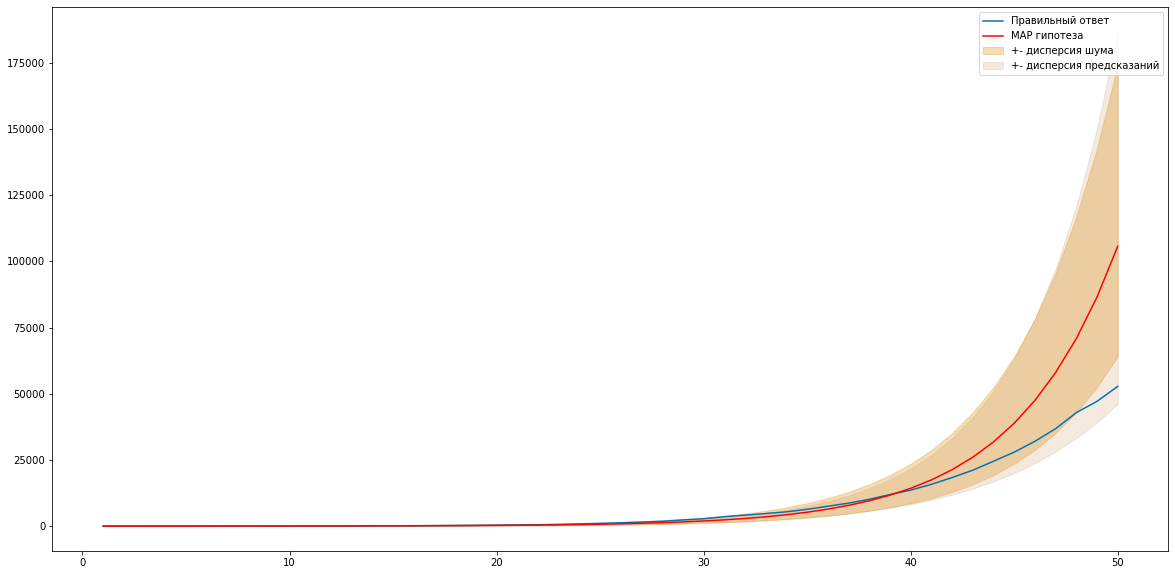

In [1007]:
px, py = range(1, 51), np.exp(y_total)
true_mu, true_sigma = cur_mu, cur_sigma
xs = np.linspace(1, 50, 50)

xq = sample_statistics(cur_mu, cur_sigma, xs, n=100)
plot_predictions(xs, cur_mu, xq, [px, py])

Видно, что для тестовых данных прогноз начинает расти очень быстро (что логично в случае экспоненциальной модели)

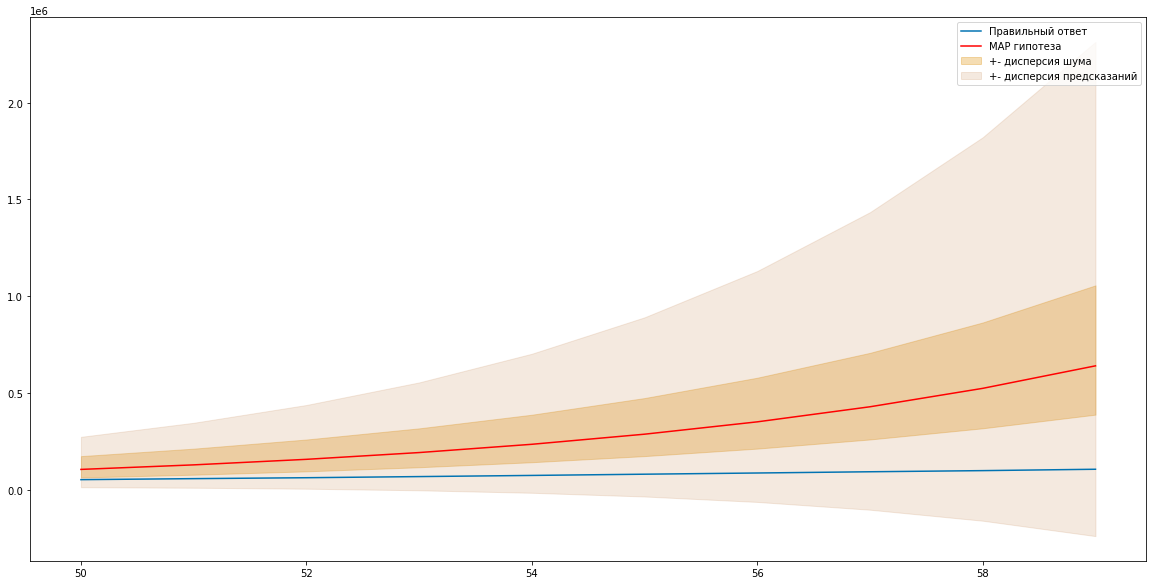

In [1008]:
px, py = range(50, 60), test.total_cases[:10]
true_mu, true_sigma = cur_mu, cur_sigma
xs = np.array(range(50, 60))
xq = sample_statistics(cur_mu, cur_sigma, xs, n = 100)
plot_predictions(xs, cur_mu, xq, [px, py])

Дальше очень сильно растёт дисперсия предсказаний

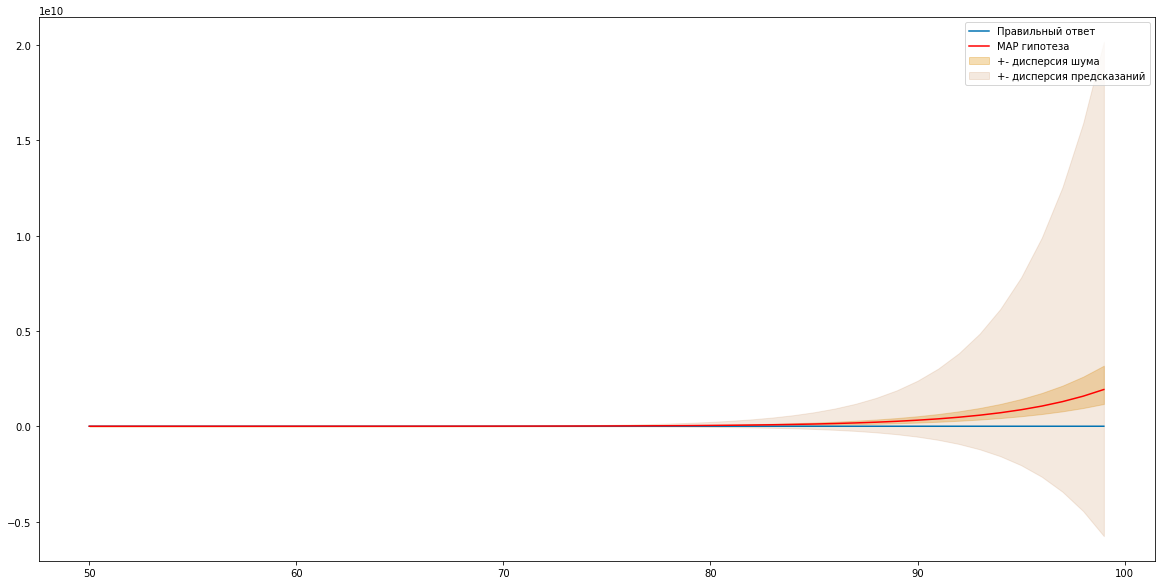

In [1010]:
px, py = range(50, 100), test.total_cases[:50]
true_mu, true_sigma = cur_mu, cur_sigma
xs = np.array(range(50, 100))
xq = sample_statistics(cur_mu, cur_sigma, xs, n = 100)
plot_predictions(xs, cur_mu, xq, [px, py])